In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/used_cars_sales.csv')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2004,Saturn,ION,3,Coupe,manual,1g8av12fx4z104018,ca,3.8,108926.0,red,gray,south bay hyundai,1575,1550,Tue May 26 2015 05:30:00 GMT-0700 (PDT)
1,2011,Honda,CR-Z,EX,Hatchback,automatic,jhmzf1d61bs007359,ca,4.9,34475.0,gray,gray,"ahfc/honda lease trust/hvt, inc. eot",10200,11500,Tue Dec 30 2014 15:00:00 GMT-0800 (PST)
2,2012,GMC,Sierra 1500,SLE,Crew Cab,automatic,3gtp1ve04cg187423,ca,3.5,57124.0,gray,black,reliance motors llc,22500,24250,Thu Feb 19 2015 04:00:00 GMT-0800 (PST)
3,2002,Infiniti,I35,Base,Sedan,automatic,jnkda31a52t019330,ma,2.3,249573.0,green,gray,imperial chevrolet,1425,950,Tue Feb 17 2015 02:00:00 GMT-0800 (PST)
4,2005,Chevrolet,Malibu,Base,Sedan,automatic,1g1zs52fx5f309343,ma,3.2,88693.0,black,gray,clay nissan of newton inc,3225,2500,Tue Jan 06 2015 02:00:00 GMT-0800 (PST)


In [3]:
## types of varibles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          125000 non-null  int64  
 1   make          122708 non-null  object 
 2   model         122683 non-null  object 
 3   trim          122628 non-null  object 
 4   body          122037 non-null  object 
 5   transmission  110236 non-null  object 
 6   vin           125000 non-null  object 
 7   state         125000 non-null  object 
 8   condition     122396 non-null  float64
 9   odometer      124979 non-null  float64
 10  color         124832 non-null  object 
 11  interior      124832 non-null  object 
 12  seller        125000 non-null  object 
 13  mmr           125000 non-null  int64  
 14  sellingprice  125000 non-null  int64  
 15  saledate      125000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 15.3+ MB


In [4]:
## check number of levels for make
df.make.nunique()

86

In [5]:
## ALL categorical ('object') unique levels
for i in df.select_dtypes('O'):
  print(f'Var {i} has {df[i].nunique()}')

Var make has 86
Var model has 844
Var trim has 1528
Var body has 80
Var transmission has 2
Var vin has 124547
Var state has 38
Var color has 20
Var interior has 17
Var seller has 8031
Var saledate has 2895


In [6]:
## vin is an uninformative variable
## make sure to drop (delete) those
df.drop('vin', axis = 1, inplace = True)

In [9]:
## selecting the most common levels will be the easiest in these cases
df.trim.value_counts()[:5]

,count
trim,
Base,12584
SE,9718
LX,4583
Limited,4132
LT,3836


In [10]:
## how do you keep the most common levels?
df['trim_base'] = (df['trim'] == "Base").astype('int')
df['trim_SE'] = (df['trim'] == "SE").astype('int')
df['trim_LX'] = (df['trim'] == "LX").astype('int')
df['trim_Limited'] = (df['trim'] == "Limited").astype('int')

## remember to drop the original variable
df.drop('trim', axis = 1, inplace = True)

In [11]:
df.head()

,year,make,model,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,trim_base,trim_SE,trim_LX,trim_Limited
0,2004,Saturn,ION,Coupe,manual,ca,3.8,108926.0,red,gray,south bay hyundai,1575,1550,Tue May 26 2015 05:30:00 GMT-0700 (PDT),0,0,0,0
1,2011,Honda,CR-Z,Hatchback,automatic,ca,4.9,34475.0,gray,gray,"ahfc/honda lease trust/hvt, inc. eot",10200,11500,Tue Dec 30 2014 15:00:00 GMT-0800 (PST),0,0,0,0
2,2012,GMC,Sierra 1500,Crew Cab,automatic,ca,3.5,57124.0,gray,black,reliance motors llc,22500,24250,Thu Feb 19 2015 04:00:00 GMT-0800 (PST),0,0,0,0
3,2002,Infiniti,I35,Sedan,automatic,ma,2.3,249573.0,green,gray,imperial chevrolet,1425,950,Tue Feb 17 2015 02:00:00 GMT-0800 (PST),1,0,0,0
4,2005,Chevrolet,Malibu,Sedan,automatic,ma,3.2,88693.0,black,gray,clay nissan of newton inc,3225,2500,Tue Jan 06 2015 02:00:00 GMT-0800 (PST),1,0,0,0


In [13]:
## Using a model to determine which makes are the most important to predict price
df.make.value_counts()[:30]

,count
make,
Ford,20832
Chevrolet,13497
Nissan,12010
Toyota,8831
Dodge,6781
Honda,6127
Hyundai,4864
BMW,4731
Kia,3999


In [14]:
## let's make a copy of the data set
df1 = df.copy()

In [17]:
## model to predict makes that are the most important
## create a df containing y and predictor (red dims)
df_make = df[['sellingprice', 'make']]
df_make.head()

,sellingprice,make
0,1550,Saturn
1,11500,Honda
2,24250,GMC
3,950,Infiniti
4,2500,Chevrolet


In [18]:
## one-hot encoding of the variable
df_make = pd.get_dummies(df_make)
df_make.head()

,sellingprice,make_Acura,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_FIAT,make_Ferrari,make_Fisker,make_Ford,make_GMC,make_Geo,make_HUMMER,make_Honda,make_Hyundai,make_Infiniti,make_Isuzu,make_Jaguar,make_Jeep,make_Kia,make_Land Rover,make_Lexus,make_Lincoln,make_MINI,make_Maserati,make_Mazda,make_Mercedes-Benz,make_Mercury,make_Mitsubishi,make_Nissan,make_Oldsmobile,make_Plymouth,make_Pontiac,make_Porsche,make_Ram,make_Rolls-Royce,make_Saab,make_Saturn,make_Scion,make_Subaru,make_Suzuki,make_Tesla,make_Toyota,make_Volkswagen,make_Volvo,make_acura,make_airstream,make_audi,make_bmw,make_buick,make_cadillac,make_chevrolet,make_chrysler,make_dodge,make_dodge tk,make_ford,make_ford truck,make_gmc,make_gmc truck,make_honda,make_hyundai,make_jeep,make_kia,make_land rover,make_landrover,make_lexus,make_lincoln,make_mazda,make_mercedes,make_mercury,make_mitsubishi,make_nissan,make_oldsmobile,make_plymouth,make_pontiac,make_porsche,make_smart,make_subaru,make_suzuki,make_toyota,make_volkswagen,make_vw
0,1550,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,11500,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,24250,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,950,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2500,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
## to select the most important variables
## recommend tree-based models
## DT, RF, XGBoost (remember to use a classifier, or regressor)
from sklearn.tree import DecisionTreeRegressor

## instance
dt = DecisionTreeRegressor(max_depth = 5)  ## 5 splits (5 levels of make)

##  fit the model on the dataset containing only y and the categorical predictor
dt.fit(df_make.drop('sellingprice', axis = 1),  df_make.sellingprice)

DecisionTreeRegressor(max_depth=5)

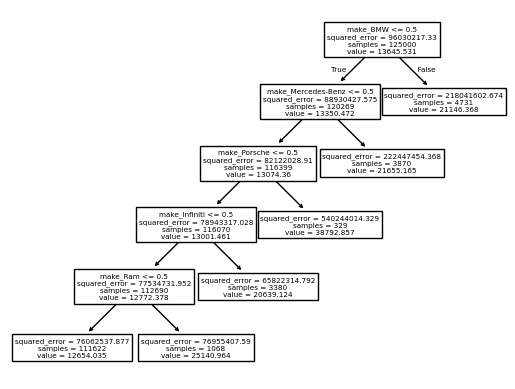

In [22]:
## plot the tree to see the levels
from sklearn.tree import plot_tree

plot_tree(dt, feature_names = df_make.drop('sellingprice', axis = 1).columns);

In [23]:
## how do you keep the most common levels?
df1['make_BMW'] = (df1['make'] == "BMW").astype('int')
df1['make_Mercedes-Benz'] = (df1['make'] == "Mercedes-Benz").astype('int')
df1['make_Porsche'] = (df1['make'] == "Porsche").astype('int')

## remember to drop the original variable
df1.drop('make', axis = 1, inplace = True)

In [24]:
## DT run extremely fast.
## would work well with many levels and many obs

In [25]:
## Let's use a RF to determine the most important levels
df2 = df.copy()

In [26]:
## sklearn RF
from sklearn.ensemble import RandomForestRegressor

## instance
rf = RandomForestRegressor() ## unrestricted works best - 100 dt

## fit the model on the dataset containing only y and the categorical predictor
rf.fit(df_make.drop('sellingprice', axis = 1),  df_make.sellingprice)

RandomForestRegressor()

In [31]:
## so which makes are the most important
feature_importances = pd.DataFrame({'Level': df_make.drop('sellingprice', axis = 1).columns, 'Importance': rf.feature_importances_})
feature_importances.sort_values('Importance', ascending = False)[:10]

,Level,Importance
3,make_BMW,0.112441
30,make_Mercedes-Benz,0.110315
37,make_Porsche,0.089543
19,make_Infiniti,0.080717
38,make_Ram,0.066763
24,make_Land Rover,0.062327
25,make_Lexus,0.061471
13,make_Ford,0.050910
39,make_Rolls-Royce,0.040029
2,make_Audi,0.035943


In [32]:
## Remember to encode
## how do you keep the most common levels?
df2['make_BMW'] = (df2['make'] == "BMW").astype('int')
df2['make_Mercedes-Benz'] = (df2['make'] == "Mercedes-Benz").astype('int')
df2['make_Porsche'] = (df2['make'] == "Porsche").astype('int')

## remember to drop the original variable
df2.drop('make', axis = 1, inplace = True)

In [ ]:
## advantage RF provides an average of the times the levels are important
## more accurate, RF finds the levels that make the most difference
## too computationally expensive (for n large or for too many levels this might not work)

In [33]:
## Other options are XGBoost
## Very computationally expensive - even more than RF
## Logistic is a linear model - requires the X matrix to be independent - no one-hot encoding

In [34]:
df.head()

,year,make,model,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,trim_base,trim_SE,trim_LX,trim_Limited
0,2004,Saturn,ION,Coupe,manual,ca,3.8,108926.0,red,gray,south bay hyundai,1575,1550,Tue May 26 2015 05:30:00 GMT-0700 (PDT),0,0,0,0
1,2011,Honda,CR-Z,Hatchback,automatic,ca,4.9,34475.0,gray,gray,"ahfc/honda lease trust/hvt, inc. eot",10200,11500,Tue Dec 30 2014 15:00:00 GMT-0800 (PST),0,0,0,0
2,2012,GMC,Sierra 1500,Crew Cab,automatic,ca,3.5,57124.0,gray,black,reliance motors llc,22500,24250,Thu Feb 19 2015 04:00:00 GMT-0800 (PST),0,0,0,0
3,2002,Infiniti,I35,Sedan,automatic,ma,2.3,249573.0,green,gray,imperial chevrolet,1425,950,Tue Feb 17 2015 02:00:00 GMT-0800 (PST),1,0,0,0
4,2005,Chevrolet,Malibu,Sedan,automatic,ma,3.2,88693.0,black,gray,clay nissan of newton inc,3225,2500,Tue Jan 06 2015 02:00:00 GMT-0800 (PST),1,0,0,0


In [35]:
## do not work with excessive number of level > 200
df.seller.nunique()

8031